In [73]:
import resources.Get_Data as Get_Data
from resources.single_data.KNN_AR import KNN_AR
import matplotlib.pyplot as plt
import pandas as pd
import julia
%load_ext julia.magic

The julia.magic extension is already loaded. To reload it, use:
  %reload_ext julia.magic


In [74]:
getter = Get_Data.Get_Data("^IXIC", "2022-02-15", "1h")#.make_norm_diff()
#print(getter)
#szereg = Get_Data.Get_Data("^IXIC", start="2021-09-20", end='2022-02-20', interval="1d").make_diff()
szereg = pd.read_csv("sim.csv")['x'][:100]
#print(szereg)
#getter.analiza_statystyczna_szeregu(szereg_pandas=szereg)

cart_ar = KNN_AR(data=szereg, params={"lags": 2,}, test_ratio=0.9)

In [75]:
#
#using Pkg
#Pkg.add("JLD2")
#Pkg.add("BetaML")
#
#using BetaML.Trees
#using JLD2
#x = rand(Float32, 100, 10) # 100 training samples, 10 predictors
#y = x[:,2] + x[:,4]
#print(typeof(y))
#myForest = buildForest(x,y,100)
#yhat = Trees.predict(myForest, x)
#print(yhat)

In [76]:
#using Pkg
#Pkg.add("JLD2")
#Pkg.add("DecisionTree")
#
#using DecisionTree
#Pkg.build("DecisionTree")
#Pkg.activate("DecisionTree")
#using JLD2

In [77]:
cart_ar = KNN_AR(data=szereg, params={"lags": 1}, test_ratio=0.9)

opt = cart_ar.cross_validation_rolling_window(dlugosc_okna=1/2, params={"k_max":40,
                                                          "weights":['uniform', 'distance'],
                                                          "p":[1, 2]})
print({"k": opt["k_max"],
       "weights": opt["weights"],
       "p": opt["p"]})
print(opt)
cart_ar.fit(params_fit={"k": opt["k_max"],
                        "weights": opt["weights"],
                        "p": opt["p"]})

cross_validation_rolling_window
{'k': '7', 'weights': 'distance', 'p': '1'}
{'k_max': '7', 'weights': 'distance', 'p': '1'}
           1
1  -1.272979
2  -0.854588
3  -0.687387
4  -0.305483
5  -0.435129
..       ...
85 -0.603918
86 -1.075125
87 -0.677187
88 -0.158617
89 -0.058055

[89 rows x 1 columns] 0    -1.272979
1    -0.854588
2    -0.687387
3    -0.305483
4    -0.435129
        ...   
84   -0.603918
85   -1.075125
86   -0.677187
87   -0.158617
88   -0.058055
Name: x, Length: 89, dtype: float64
fit


In [78]:
#using PyCall
#dlugosc_okna = 1/2
#X = py"cart_ar.X.values"
#data = py"cart_ar.data.values"
#prog = convert(Int64, round(dlugosc_okna * length(X)))
#
#X = reshape(X, size(X))
#data = reshape(data, size(data))
#X = reshape(X, size(X))
#
#println(typeof(X))
#println(typeof(data))
#println(typeof(prog))
#println(typeof(dlugosc_okna))
#println(typeof(Dict("dlugosc_okna"=> dlugosc_okna,
#                     "prog"=> prog,
#                     "data"=> data,
#                     "X"=> X,
#                     "params"=> Dict(
#                                    "max_depth"=> 3,
#                                    "max_n_estimators"=> 3,
#                                    "min_sample_split"=> 3,
#                                    "min_samples_leaf"=> 3))))
#println("--------------------------------------------------------------")
#include("resources/fast_jl/rf_cross_val.jl")
#
#
#rf_cross_val(Dict("dlugosc_okna"=> dlugosc_okna,
#                     "prog"=> prog,
#                     "data"=> data,
#                     "X"=> X,
#                     "params"=> Dict(
#                                    "max_depth"=> 3,
#                                    "max_n_estimators"=> 3,
#                                    "min_sample_split"=> 3,
#                                    "min_samples_leaf"=> 3)))

In [79]:
print(cart_ar.X)

           1
1  -1.272979
2  -0.854588
3  -0.687387
4  -0.305483
5  -0.435129
..       ...
85 -0.603918
86 -1.075125
87 -0.677187
88 -0.158617
89 -0.058055

[89 rows x 1 columns]


In [80]:
#from julia import Pkg
#from julia import Main
#
#Pkg.add("DecisionTree")
#Main.using("DecisionTree")
#
#opt = cart_ar.cross_validation_rolling_window_julia(1/3, {
#    "max_depth": 3,
#    "min_samples_split": 5,
#    "min_samples_leaf": 5
#})

In [81]:
#opt = cart_ar.cross_validation_rolling_window_julia(1/2, {
#    "max_depth": 2,
#    "max_n_estimators": 20,
#    "min_sample_split": 20,
#    "min_samples_leaf": 20
#})

In [82]:
cart_ar.fit(params_fit={"k":opt["k_max"],
                       "p":int(opt["p"]),
                       "weights":opt["weights"]})

           1
1  -1.272979
2  -0.854588
3  -0.687387
4  -0.305483
5  -0.435129
..       ...
85 -0.603918
86 -1.075125
87 -0.677187
88 -0.158617
89 -0.058055

[89 rows x 1 columns] 0    -1.272979
1    -0.854588
2    -0.687387
3    -0.305483
4    -0.435129
        ...   
84   -0.603918
85   -1.075125
86   -0.677187
87   -0.158617
88   -0.058055
Name: x, Length: 89, dtype: float64
fit


forecast_raw
forecast_raw
forecast_raw
SUMA:  8  /  10


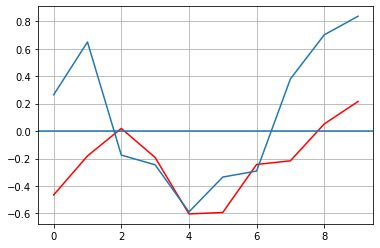

In [85]:
import numpy as np
plt.plot(np.cumsum(cart_ar.forecast_raw()), c='r')
plt.plot(np.cumsum(cart_ar.data_test.values))
plt.axhline(0)
plt.grid()

print("SUMA: ",sum(cart_ar.data_test.values * cart_ar.forecast_raw() > 0), " / ", len(cart_ar.forecast_raw()))